In [59]:
from quantopian.pipeline import Pipeline, CustomFactor
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import SimpleMovingAverage,AverageDollarVolume
from quantopian.pipeline.data.builtin import USEquityPricing
import numpy as np

# HOW TO USE THE PIPELINE API

## Initialising a pipeline

In [60]:
pipe = Pipeline()
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head()

Empty DataFrame
Columns: []
Index: [(2016-01-04 00:00:00+00:00, Equity(2 [ARNC])), (2016-01-04 00:00:00+00:00, Equity(21 [AAME])), (2016-01-04 00:00:00+00:00, Equity(24 [AAPL])), (2016-01-04 00:00:00+00:00, Equity(25 [ARNC_PR])), (2016-01-04 00:00:00+00:00, Equity(31 [ABAX]))]

## Building a factor
Factors are numerical values.

In [61]:
sma = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10)

## Building a Filter
Filters are boolean values.

In [62]:
adv = AverageDollarVolume(window_length=10)

## Adding factors and filters to pipeline

In [63]:
pipe.add(sma,'sma')
pipe.add(adv,'adv')

In [64]:
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head()

adv       sma
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])      1.705740e+08    9.7505
                          Equity(21 [AAME])     2.029059e+04    4.8000
                          Equity(24 [AAPL])     3.308575e+09  107.4180
                          Equity(25 [ARNC_PR])  1.440526e+04   84.0998
                          Equity(31 [ABAX])     6.766586e+06   54.6990

## Adding a screen
This is to screen out any equities that we are not interested in to reduce computation. Here, we see that only a few equities are left in the pipe.

In [65]:
my_screen = AverageDollarVolume(window_length=10)>1e8
pipe = Pipeline(screen=my_screen)
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head(100)

Empty DataFrame
Columns: []
Index: [(2016-01-04 00:00:00+00:00, Equity(2 [ARNC])), (2016-01-04 00:00:00+00:00, Equity(24 [AAPL])), (2016-01-04 00:00:00+00:00, Equity(62 [ABT])), (2016-01-04 00:00:00+00:00, Equity(114 [ADBE])), (2016-01-04 00:00:00+00:00, Equity(128 [ADM])), (2016-01-04 00:00:00+00:00, Equity(161 [AEP])), (2016-01-04 00:00:00+00:00, Equity(168 [AET])), (2016-01-04 00:00:00+00:00, Equity(216 [HES])), (2016-01-04 00:00:00+00:00, Equity(239 [AIG])), (2016-01-04 00:00:00+00:00, Equity(337 [AMAT])), (2016-01-04 00:00:00+00:00, Equity(357 [TWX])), (2016-01-04 00:00:00+00:00, Equity(368 [AMGN])), (2016-01-04 00:00:00+00:00, Equity(448 [APA])), (2016-01-04 00:00:00+00:00, Equity(455 [APC])), (2016-01-04 00:00:00+00:00, Equity(460 [APD])), (2016-01-04 00:00:00+00:00, Equity(679 [AXP])), (2016-01-04 00:00:00+00:00, Equity(698 [BA])), (2016-01-04 00:00:00+00:00, Equity(700 [BAC])), (2016-01-04 00:00:00+00:00, Equity(734 [BAX])), (2016-01-04 00:00:00+00:00, Equity(739 [BBBY])), (2016-01-04 00:00:00+00:00, Equity(794 [BDX])), (2016-01-04 00:00:00+00:00, Equity(812 [BEN])), (2016-01-04 00:00:00+00:00, Equity(858 [BHI])), (2016-01-04 00:00:00+00:00, Equity(903 [BK])), (2016-01-04 00:00:00+00:00, Equity(980 [BMY])), (2016-01-04 00:00:00+00:00, Equity(1228 [CAG])), (2016-01-04 00:00:00+00:00, Equity(1267 [CAT])), (2016-01-04 00:00:00+00:00, Equity(1274 [CB])), (2016-01-04 00:00:00+00:00, Equity(1335 [C])), (2016-01-04 00:00:00+00:00, Equity(1406 [CELG])), (2016-01-04 00:00:00+00:00, Equity(1539 [CI])), (2016-01-04 00:00:00+00:00, Equity(1582 [CL])), (2016-01-04 00:00:00+00:00, Equity(1637 [CMCS_A])), (2016-01-04 00:00:00+00:00, Equity(1746 [COG])), (2016-01-04 00:00:00+00:00, Equity(1787 [COST])), (2016-01-04 00:00:00+00:00, Equity(1900 [CSCO])), (2016-01-04 00:00:00+00:00, Equity(1937 [CSX])), (2016-01-04 00:00:00+00:00, Equity(1985 [CMI])), (2016-01-04 00:00:00+00:00, Equity(2071 [D])), (2016-01-04 00:00:00+00:00, Equity(2119 [DD])), (2016-01-04 00:00:00+00:00, Equity(2127 [DE])), (2016-01-04 00:00:00+00:00, Equity(2170 [DHR])), (2016-01-04 00:00:00+00:00, Equity(2174 [DIA])), (2016-01-04 00:00:00+00:00, Equity(2190 [DIS])), (2016-01-04 00:00:00+00:00, Equity(2263 [DOW])), (2016-01-04 00:00:00+00:00, Equity(2351 [DUK])), (2016-01-04 00:00:00+00:00, Equity(2368 [DVN])), (2016-01-04 00:00:00+00:00, Equity(2518 [EMC])), (2016-01-04 00:00:00+00:00, Equity(2530 [EMR])), (2016-01-04 00:00:00+00:00, Equity(2564 [EOG])), (2016-01-04 00:00:00+00:00, Equity(2602 [EA])), (2016-01-04 00:00:00+00:00, Equity(2618 [ESRX])), (2016-01-04 00:00:00+00:00, Equity(2633 [ETN])), (2016-01-04 00:00:00+00:00, Equity(2673 [F])), (2016-01-04 00:00:00+00:00, Equity(2754 [M])), (2016-01-04 00:00:00+00:00, Equity(2765 [FDX])), (2016-01-04 00:00:00+00:00, Equity(2855 [FITB])), (2016-01-04 00:00:00+00:00, Equity(2968 [NEE])), (2016-01-04 00:00:00+00:00, Equity(3149 [GE])), (2016-01-04 00:00:00+00:00, Equity(3212 [GILD])), (2016-01-04 00:00:00+00:00, Equity(3214 [GIS])), (2016-01-04 00:00:00+00:00, Equity(3241 [GLW])), (2016-01-04 00:00:00+00:00, Equity(3443 [HAL])), (2016-01-04 00:00:00+00:00, Equity(3496 [HD])), (2016-01-04 00:00:00+00:00, Equity(3642 [HOT])), (2016-01-04 00:00:00+00:00, Equity(3735 [HPQ])), (2016-01-04 00:00:00+00:00, Equity(3766 [IBM])), (2016-01-04 00:00:00+00:00, Equity(3806 [BIIB])), (2016-01-04 00:00:00+00:00, Equity(3951 [INTC])), (2016-01-04 00:00:00+00:00, Equity(4151 [JNJ])), (2016-01-04 00:00:00+00:00, Equity(4221 [KEY])), (2016-01-04 00:00:00+00:00, Equity(4263 [KMB])), (2016-01-04 00:00:00+00:00, Equity(4283 [KO])), (2016-01-04 00:00:00+00:00, Equity(4297 [KR])), (2016-01-04 00:00:00+00:00, Equity(4313 [KSS])), (2016-01-04 00:00:00+00:00, Equity(4315 [KSU])), (2016-01-04 00:00:00+00:00, Equity(4417 [LEN])), (2016-01-04 00:00:00+00:00, Equity(4487 [LLY])), (2016-01-04 00:00:00+00:00, Equity(4521 [LOW])), (2016-01-04 00:00:00+00:00, Equity(4589 [LUV])), (2016-01-04 00:00:00+00:00, Equity(4707 [MCD])), (2016-01-04 00:00:00+00:00,

## Adding a mask
Masks reduce the number of equities that are calculated in a factor to save computation. Be sure to also screen out the values that you masked out, otherwise you end up with lots of NaN's.

In [66]:
my_mask = AverageDollarVolume(window_length=10)>1e8
sma = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10,mask=my_mask)
my_screen = AverageDollarVolume(window_length=10)>1e8 
pipe = Pipeline(screen=my_screen)
pipe.add(sma,'sma')
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head(100)

sma
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])       9.750500
                          Equity(24 [AAPL])    107.418000
                          Equity(62 [ABT])      44.873000
                          Equity(114 [ADBE])    93.862000
                          Equity(128 [ADM])     36.146000
                          Equity(161 [AEP])     57.879000
                          Equity(168 [AET])    109.182000
                          Equity(216 [HES])     49.043000
                          Equity(239 [AIG])     61.223500
                          Equity(337 [AMAT])    18.748000
                          Equity(357 [TWX])     64.319300
                          Equity(368 [AMGN])   161.975000
                          Equity(448 [APA])     44.210000
                          Equity(455 [APC])     48.659000
                          Equity(460 [APD])    130.780230
                          Equity(679 [AXP])     69.479500
                          Equity(698 [BA])     143.882000
                          Equity(700 [BAC])     17.102500
                          Equity(734 [BAX])     37.768500
                          Equity(739 [BBBY])    49.592000
                          Equity(794 [BDX])    155.009000
                          Equity(812 [BEN])     36.317811
                          Equity(858 [BHI])     45.549000
                          Equity(903 [BK])      41.101000
                          Equity(980 [BMY])     68.542084
                          Equity(1228 [CAG])    41.807500
                          Equity(1267 [CAT])    67.728800
                          Equity(1274 [CB])    132.426900
                          Equity(1335 [C])      52.261300
                          Equity(1406 [CELG])  116.947000
...                                                   ...
                          Equity(4221 [KEY])    13.133000
                          Equity(4263 [KMB])   126.931000
                          Equity(4283 [KO])     43.296400
                          Equity(4297 [KR])     41.990500
                          Equity(4313 [KSS])    46.826500
                          Equity(4315 [KSU])    72.602402
                          Equity(4417 [LEN])    48.796000
                          Equity(4487 [LLY])    85.707000
                          Equity(4521 [LOW])    75.775000
                          Equity(4589 [LUV])    43.504900
                          Equity(4707 [MCD])   118.326000
                          Equity(4758 [MDT])    77.187504
                          Equity(4799 [CVS])    97.547000
                          Equity(4922 [MMM])   150.111000
                          Equity(4954 [MO])     57.994371
                          Equity(5029 [MRK])    52.639000
                          Equity(5035 [MRO])    12.940000
                          Equity(5061 [MSFT])   55.579000
                          Equity(5121 [MU])     14.371500
                          Equity(5166 [MYL])    54.197000
                          Equity(5213 [NBL])    32.591400
                          Equity(5328 [NKE])    64.152400
                          Equity(5382 [JWN])    50.656600
                          Equity(5387 [NOC])   189.218000
                          Equity(5520 [NWL])    44.301000
                          Equity(5692 [ORCL])   36.601047
                          Equity(5729 [OXY])    67.474000
                          Equity(5822 [PCP])   231.483000
                          Equity(5885 [PEP])   100.091000
                          Equity(5923 [PFE])    32.468700

[100 rows x 1 columns]

## Classifiers
Classifiers are categorical values which can be strings or labels

In [67]:
# This is an example of a label
from quantopian.pipeline.classifiers.morningstar import Sector
sector = Sector()
pipe.add(sector,'sector')
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head(20)

sector        sma
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])       101    9.75050
                          Equity(24 [AAPL])      311  107.41800
                          Equity(62 [ABT])       206   44.87300
                          Equity(114 [ADBE])     311   93.86200
                          Equity(128 [ADM])      205   36.14600
                          Equity(161 [AEP])      207   57.87900
                          Equity(168 [AET])      206  109.18200
                          Equity(216 [HES])      309   49.04300
                          Equity(239 [AIG])      103   61.22350
                          Equity(337 [AMAT])     311   18.74800
                          Equity(357 [TWX])      102   64.31930
                          Equity(368 [AMGN])     206  161.97500
                          Equity(448 [APA])      309   44.21000
                          Equity(455 [APC])      309   48.65900
                          Equity(460 [APD])      101  130.78023
                          Equity(679 [AXP])      103   69.47950
                          Equity(698 [BA])       310  143.88200
                          Equity(700 [BAC])      103   17.10250
                          Equity(734 [BAX])      206   37.76850
                          Equity(739 [BBBY])     102   49.59200

In [68]:
# Here another example of a label
dollar_volume_quantiles = AverageDollarVolume(window_length=10).quantiles(10)
pipe.add(dollar_volume_quantiles,'dollar_volume_quantiles')
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head(20)

dollar_volume_quantiles  sector  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])                          9     101   
                          Equity(24 [AAPL])                         9     311   
                          Equity(62 [ABT])                          9     206   
                          Equity(114 [ADBE])                        9     311   
                          Equity(128 [ADM])                         9     205   
                          Equity(161 [AEP])                         9     207   
                          Equity(168 [AET])                         9     206   
                          Equity(216 [HES])                         9     309   
                          Equity(239 [AIG])                         9     103   
                          Equity(337 [AMAT])                        9     311   
                          Equity(357 [TWX])                         9     102   
                          Equity(368 [AMGN])                        9     206   
                          Equity(448 [APA])                         9     309   
                          Equity(455 [APC])                         9     309   
                          Equity(460 [APD])                         9     101   
                          Equity(679 [AXP])                         9     103   
                          Equity(698 [BA])                          9     310   
                          Equity(700 [BAC])                         9     103   
                          Equity(734 [BAX])                         9     206   
                          Equity(739 [BBBY])                        9     102   

                                                    sma  
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])      9.75050  
                          Equity(24 [AAPL])   107.41800  
                          Equity(62 [ABT])     44.87300  
                          Equity(114 [ADBE])   93.86200  
                          Equity(128 [ADM])    36.14600  
                          Equity(161 [AEP])    57.87900  
                          Equity(168 [AET])   109.18200  
                          Equity(216 [HES])    49.04300  
                          Equity(239 [AIG])    61.22350  
                          Equity(337 [AMAT])   18.74800  
                          Equity(357 [TWX])    64.31930  
                          Equity(368 [AMGN])  161.97500  
                          Equity(448 [APA])    44.21000  
                          Equity(455 [APC])    48.65900  
                          Equity(460 [APD])   130.78023  
                          Equity(679 [AXP])    69.47950  
                          Equity(698 [BA])    143.88200  
                          Equity(700 [BAC])    17.10250  
                          Equity(734 [BAX])    37.76850  
                          Equity(739 [BBBY])   49.59200

## Combined Factors
We can combine built-in factors into new ones

In [69]:
sma10 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=10,mask=my_mask)
sma20 = SimpleMovingAverage(inputs=[USEquityPricing.close],window_length=20,mask=my_mask)
sma_ratio = sma20/sma10
pipe.add(sma_ratio,'sma_ratio')
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head()

dollar_volume_quantiles  sector  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])                          9     101   
                          Equity(24 [AAPL])                         9     311   
                          Equity(62 [ABT])                          9     206   
                          Equity(114 [ADBE])                        9     311   
                          Equity(128 [ADM])                         9     205   

                                                   sma  sma_ratio  
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])      9.7505   0.961720  
                          Equity(24 [AAPL])   107.4180   1.035287  
                          Equity(62 [ABT])     44.8730   1.003298  
                          Equity(114 [ADBE])   93.8620   0.988238  
                          Equity(128 [ADM])    36.1460   0.986140

## Extracting data from the pipe

In [70]:
dates = res.index.get_level_values(0)
dates

DatetimeIndex(['2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04',
               '2016-01-04', '2016-01-04', '2016-01-04', '2016-01-04',
               '2016-01-04', '2016-01-04',
               ...
               '2017-01-03', '2017-01-03', '2017-01-03', '2017-01-03',
               '2017-01-03', '2017-01-03', '2017-01-03', '2017-01-03',
               '2017-01-03', '2017-01-03'],
              dtype='datetime64[ns, UTC]', length=118607, freq=None)

In [71]:
assets = res.index.get_level_values(1)
assets

Index([    Equity(2 [ARNC]),    Equity(24 [AAPL]),     Equity(62 [ABT]),
         Equity(114 [ADBE]),    Equity(128 [ADM]),    Equity(161 [AEP]),
          Equity(168 [AET]),    Equity(216 [HES]),    Equity(239 [AIG]),
         Equity(337 [AMAT]),
       ...
        Equity(45993 [HLT]), Equity(46631 [GOOG]),  Equity(47415 [SYF]),
       Equity(47430 [MBLY]), Equity(47740 [BABA]),  Equity(47777 [CFG]),
        Equity(49229 [KHC]), Equity(49242 [PYPL]),  Equity(49506 [HPE]),
       Equity(50077 [TWLO])],
      dtype='object', length=118607)

In [72]:
res.ix[[(dates[0],assets[0])]]

,,dollar_volume_quantiles,sector,sma,sma_ratio
2016-01-04 00:00:00+00:00,Equity(2 [ARNC]),9,101,9.7505,0.96172


## Custom Factors

In [73]:
from quantopian.pipeline import CustomFactor
from quantopian.pipeline.factors import Returns
class MomentumFactor(CustomFactor):
    window_length = 252
    def compute(self,today,assets,out,close,returns):
        out[:] = ((close[-21] - close[-252])/close[-252] -
                      (close[-1] - close[-21])/close[-21]) / np.nanstd(returns, axis=0)
    

In [74]:
returns = Returns(window_length=126)
momentum = MomentumFactor(inputs=[USEquityPricing.close,returns])
#pipe.remove('momentum')
pipe.add(momentum,'momentum')

In [75]:
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head()

dollar_volume_quantiles  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])                          9   
                          Equity(24 [AAPL])                         9   
                          Equity(62 [ABT])                          9   
                          Equity(114 [ADBE])                        9   
                          Equity(128 [ADM])                         9   

                                              momentum  sector       sma  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])   -3.906100     101    9.7505   
                          Equity(24 [AAPL])   1.119194     311  107.4180   
                          Equity(62 [ABT])    0.381835     206   44.8730   
                          Equity(114 [ADBE])  4.298491     311   93.8620   
                          Equity(128 [ADM])  -2.651791     205   36.1460   

                                              sma_ratio  
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])     0.961720  
                          Equity(24 [AAPL])    1.035287  
                          Equity(62 [ABT])     1.003298  
                          Equity(114 [ADBE])   0.988238  
                          Equity(128 [ADM])    0.986140

## Data Sets

### Pricing Data
We can see that each column has a type called **dtype**

In [76]:
from quantopian.pipeline.data.builtin import USEquityPricing
USEquityPricing.volume

USEquityPricing.volume::float64

### Fundamental Data
These data are supplied by Morningstar

In [77]:
from quantopian.pipeline.data import morningstar
market_cap = morningstar.valuation.market_cap.latest
#pipe.remove('market_cap')
pipe.add(market_cap,'market_cap')

In [78]:
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head()

dollar_volume_quantiles  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])                          9   
                          Equity(24 [AAPL])                         9   
                          Equity(62 [ABT])                          9   
                          Equity(114 [ADBE])                        9   
                          Equity(128 [ADM])                         9   

                                                market_cap  momentum  sector  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])    1.304890e+10 -3.906100     101   
                          Equity(24 [AAPL])   5.983450e+11  1.119194     311   
                          Equity(62 [ABT])    6.753020e+10  0.381835     206   
                          Equity(114 [ADBE])  4.752560e+10  4.298491     311   
                          Equity(128 [ADM])   2.200780e+10 -2.651791     205   

                                                   sma  sma_ratio  
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])      9.7505   0.961720  
                          Equity(24 [AAPL])   107.4180   1.035287  
                          Equity(62 [ABT])     44.8730   1.003298  
                          Equity(114 [ADBE])   93.8620   0.988238  
                          Equity(128 [ADM])    36.1460   0.986140

### Partner Data

In [79]:
from quantopian.pipeline.data import quandl
dir(quandl)

['adp_empl_sec',
 'bundesbank_bbk01_wt5511',
 'cboe_rvx',
 'cboe_skew',
 'cboe_vix',
 'cboe_vvix',
 'cboe_vxd',
 'cboe_vxfxi',
 'cboe_vxmt',
 'cboe_vxn',
 'cboe_vxv',
 'cboe_vxxle',
 'chris_cme_cl1',
 'chris_ice_b1',
 'chris_ice_t1',
 'currfx_usdeur',
 'fred_ccsa',
 'fred_gdp',
 'fred_gdpc96',
 'fred_gdpdef',
 'fred_gnp',
 'fred_gnpc96',
 'fred_icsa',
 'fred_retailsmnsa',
 'fred_unrate',
 'fred_usdontd156n',
 'oda_usa_ngdp_rpch',
 'rateinf_inflation_usa',
 'ugid_infl_usa',
 'yahoo_index_vix']

In [80]:
vxn = quandl.cboe_vxn.close

In [81]:
sma_vxn = SimpleMovingAverage(window_length=10,inputs=[vxn])

In [82]:
pipe.add(sma_vxn,'sma_vxn')

In [83]:
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head()

dollar_volume_quantiles  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])                          9   
                          Equity(24 [AAPL])                         9   
                          Equity(62 [ABT])                          9   
                          Equity(114 [ADBE])                        9   
                          Equity(128 [ADM])                         9   

                                                market_cap  momentum  sector  \
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])    1.304890e+10 -3.906100     101   
                          Equity(24 [AAPL])   5.983450e+11  1.119194     311   
                          Equity(62 [ABT])    6.753020e+10  0.381835     206   
                          Equity(114 [ADBE])  4.752560e+10  4.298491     311   
                          Equity(128 [ADM])   2.200780e+10 -2.651791     205   

                                                   sma  sma_ratio  sma_vxn  
2016-01-04 00:00:00+00:00 Equity(2 [ARNC])      9.7505   0.961720   19.109  
                          Equity(24 [AAPL])   107.4180   1.035287   19.109  
                          Equity(62 [ABT])     44.8730   1.003298   19.109  
                          Equity(114 [ADBE])   93.8620   0.988238   19.109  
                          Equity(128 [ADM])    36.1460   0.986140   19.109

## Select Tradeable Stocks

In [84]:
from quantopian.pipeline.filters.morningstar import IsPrimaryShare

# Filter for primary share equities. IsPrimaryShare is a built-in filter.
primary_share = IsPrimaryShare()

In [85]:
# Equities listed as common stock (as opposed to, say, preferred stock).
# 'ST00000001' indicates common stock.
common_stock = morningstar.share_class_reference.security_type.latest.eq('ST00000001')

# Non-depositary receipts. Recall that the ~ operator inverts filters,
# turning Trues into Falses and vice versa
not_depositary = ~morningstar.share_class_reference.is_depositary_receipt.latest

# Equities not trading over-the-counter.
not_otc = ~morningstar.share_class_reference.exchange_id.latest.startswith('OTC')

# Not when-issued equities.
not_wi = ~morningstar.share_class_reference.symbol.latest.endswith('.WI')

# Equities without LP in their name, .matches does a match using a regular
# expression
not_lp_name = ~morningstar.company_reference.standard_name.latest.matches('.* L[. ]?P.?$')

# Equities with a null value in the limited_partnership Morningstar
# fundamental field.
not_lp_balance_sheet = morningstar.balance_sheet.limited_partnership.latest.isnull()

# Equities whose most recent Morningstar market cap is not null have
# fundamental data and therefore are not ETFs.
have_market_cap = morningstar.valuation.market_cap.latest.notnull()

Now we are creating a compound filter that screens out all stocks that are not tradeable.

In [98]:
tradeable_stocks = (
    primary_share
    & common_stock
    & not_depositary
    & not_otc
    & not_wi
    & not_lp_name
    & not_lp_balance_sheet
    & have_market_cap
)
adv_screen = AverageDollarVolume(window_length=10)>1e8
my_screen = adv_screen & tradeable_stocks

In [99]:
pipe = Pipeline(screen=my_screen)
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')
res.head(100)

Empty DataFrame
Columns: []
Index: [(2016-01-04 00:00:00+00:00, Equity(2 [ARNC])), (2016-01-04 00:00:00+00:00, Equity(24 [AAPL])), (2016-01-04 00:00:00+00:00, Equity(62 [ABT])), (2016-01-04 00:00:00+00:00, Equity(114 [ADBE])), (2016-01-04 00:00:00+00:00, Equity(128 [ADM])), (2016-01-04 00:00:00+00:00, Equity(161 [AEP])), (2016-01-04 00:00:00+00:00, Equity(168 [AET])), (2016-01-04 00:00:00+00:00, Equity(216 [HES])), (2016-01-04 00:00:00+00:00, Equity(239 [AIG])), (2016-01-04 00:00:00+00:00, Equity(337 [AMAT])), (2016-01-04 00:00:00+00:00, Equity(357 [TWX])), (2016-01-04 00:00:00+00:00, Equity(368 [AMGN])), (2016-01-04 00:00:00+00:00, Equity(448 [APA])), (2016-01-04 00:00:00+00:00, Equity(455 [APC])), (2016-01-04 00:00:00+00:00, Equity(460 [APD])), (2016-01-04 00:00:00+00:00, Equity(679 [AXP])), (2016-01-04 00:00:00+00:00, Equity(698 [BA])), (2016-01-04 00:00:00+00:00, Equity(700 [BAC])), (2016-01-04 00:00:00+00:00, Equity(734 [BAX])), (2016-01-04 00:00:00+00:00, Equity(739 [BBBY])), (2016-01-04 00:00:00+00:00, Equity(794 [BDX])), (2016-01-04 00:00:00+00:00, Equity(812 [BEN])), (2016-01-04 00:00:00+00:00, Equity(858 [BHI])), (2016-01-04 00:00:00+00:00, Equity(903 [BK])), (2016-01-04 00:00:00+00:00, Equity(980 [BMY])), (2016-01-04 00:00:00+00:00, Equity(1228 [CAG])), (2016-01-04 00:00:00+00:00, Equity(1267 [CAT])), (2016-01-04 00:00:00+00:00, Equity(1274 [CB])), (2016-01-04 00:00:00+00:00, Equity(1335 [C])), (2016-01-04 00:00:00+00:00, Equity(1406 [CELG])), (2016-01-04 00:00:00+00:00, Equity(1539 [CI])), (2016-01-04 00:00:00+00:00, Equity(1582 [CL])), (2016-01-04 00:00:00+00:00, Equity(1637 [CMCS_A])), (2016-01-04 00:00:00+00:00, Equity(1746 [COG])), (2016-01-04 00:00:00+00:00, Equity(1787 [COST])), (2016-01-04 00:00:00+00:00, Equity(1900 [CSCO])), (2016-01-04 00:00:00+00:00, Equity(1937 [CSX])), (2016-01-04 00:00:00+00:00, Equity(1985 [CMI])), (2016-01-04 00:00:00+00:00, Equity(2071 [D])), (2016-01-04 00:00:00+00:00, Equity(2119 [DD])), (2016-01-04 00:00:00+00:00, Equity(2127 [DE])), (2016-01-04 00:00:00+00:00, Equity(2170 [DHR])), (2016-01-04 00:00:00+00:00, Equity(2190 [DIS])), (2016-01-04 00:00:00+00:00, Equity(2263 [DOW])), (2016-01-04 00:00:00+00:00, Equity(2351 [DUK])), (2016-01-04 00:00:00+00:00, Equity(2368 [DVN])), (2016-01-04 00:00:00+00:00, Equity(2518 [EMC])), (2016-01-04 00:00:00+00:00, Equity(2530 [EMR])), (2016-01-04 00:00:00+00:00, Equity(2564 [EOG])), (2016-01-04 00:00:00+00:00, Equity(2602 [EA])), (2016-01-04 00:00:00+00:00, Equity(2618 [ESRX])), (2016-01-04 00:00:00+00:00, Equity(2633 [ETN])), (2016-01-04 00:00:00+00:00, Equity(2673 [F])), (2016-01-04 00:00:00+00:00, Equity(2754 [M])), (2016-01-04 00:00:00+00:00, Equity(2765 [FDX])), (2016-01-04 00:00:00+00:00, Equity(2855 [FITB])), (2016-01-04 00:00:00+00:00, Equity(2968 [NEE])), (2016-01-04 00:00:00+00:00, Equity(3149 [GE])), (2016-01-04 00:00:00+00:00, Equity(3212 [GILD])), (2016-01-04 00:00:00+00:00, Equity(3214 [GIS])), (2016-01-04 00:00:00+00:00, Equity(3241 [GLW])), (2016-01-04 00:00:00+00:00, Equity(3443 [HAL])), (2016-01-04 00:00:00+00:00, Equity(3496 [HD])), (2016-01-04 00:00:00+00:00, Equity(3642 [HOT])), (2016-01-04 00:00:00+00:00, Equity(3735 [HPQ])), (2016-01-04 00:00:00+00:00, Equity(3766 [IBM])), (2016-01-04 00:00:00+00:00, Equity(3806 [BIIB])), (2016-01-04 00:00:00+00:00, Equity(3951 [INTC])), (2016-01-04 00:00:00+00:00, Equity(4151 [JNJ])), (2016-01-04 00:00:00+00:00, Equity(4221 [KEY])), (2016-01-04 00:00:00+00:00, Equity(4263 [KMB])), (2016-01-04 00:00:00+00:00, Equity(4283 [KO])), (2016-01-04 00:00:00+00:00, Equity(4297 [KR])), (2016-01-04 00:00:00+00:00, Equity(4313 [KSS])), (2016-01-04 00:00:00+00:00, Equity(4315 [KSU])), (2016-01-04 00:00:00+00:00, Equity(4417 [LEN])), (2016-01-04 00:00:00+00:00, Equity(4487 [LLY])), (2016-01-04 00:00:00+00:00, Equity(4521 [LOW])), (2016-01-04 00:00:00+00:00, Equity(4589 [LUV])), (2016-01-04 00:00:00+00:00, Equity(4707 [MCD])), (2016-01-04 00:00:00+00:00, Equity(4758 [MDT])), (2016-01-04 00:00:00+00:00,

# Factor Analysis

In [100]:
import alphalens as al
from quantopian.pipeline.filters import Q1500US

MORNINGSTAR_SECTOR_CODES = {
     -1: 'Misc',
    101: 'Basic Materials',
    102: 'Consumer Cyclical',
    103: 'Financial Services',
    104: 'Real Estate',
    205: 'Consumer Defensive',
    206: 'Healthcare',
    207: 'Utilities',
    308: 'Communication Services',
    309: 'Energy',
    310: 'Industrials',
    311: 'Technology' ,    
}

universe = Q1500US


In [101]:
asset_list = res.index.levels[1].unique()
asset_list

array([Equity(2 [ARNC]), Equity(24 [AAPL]), Equity(53 [ABMD]),
       Equity(62 [ABT]), Equity(67 [ADSK]), Equity(76 [TAP]),
       Equity(114 [ADBE]), Equity(122 [ADI]), Equity(128 [ADM]),
       Equity(161 [AEP]), Equity(168 [AET]), Equity(185 [AFL]),
       Equity(216 [HES]), Equity(239 [AIG]), Equity(300 [ALK]),
       Equity(301 [ALKS]), Equity(337 [AMAT]), Equity(351 [AMD]),
       Equity(353 [AME]), Equity(357 [TWX]), Equity(368 [AMGN]),
       Equity(410 [AN]), Equity(438 [AON]), Equity(448 [APA]),
       Equity(455 [APC]), Equity(460 [APD]), Equity(465 [APH]),
       Equity(510 [ARG]), Equity(559 [ASH]), Equity(600 [OA]),
       Equity(607 [ATML]), Equity(630 [ADP]), Equity(679 [AXP]),
       Equity(693 [AZO]), Equity(698 [BA]), Equity(700 [BAC]),
       Equity(734 [BAX]), Equity(739 [BBBY]), Equity(754 [BBY]),
       Equity(779 [BCR]), Equity(794 [BDX]), Equity(799 [BEAV]),
       Equity(812 [BEN]), Equity(858 [BHI]), Equity(903 [BK]),
       Equity(939 [BLL]), Equity(980 [BM

In [131]:
prices = get_pricing(asset_list, start_date='2016-01-01', end_date='2017-01-01', fields='price')

In [132]:
momentum = MomentumFactor(inputs=[USEquityPricing.close,returns])
#pipe.add(momentum,'momentum')

In [133]:
sector = Sector()
#pipe.add(sector,'sector')
res = run_pipeline(pipe,'2016-01-01', '2017-01-01')

In [134]:
sectors = res['sector']
my_factor = res['momentum']

In [135]:
        
factor_data = al.utils.get_clean_factor_and_forward_returns(my_factor,
                                                                   prices,
                                                                   quantiles=5,
                                                                   groupby=sectors,
                                                                   groupby_labels=MORNINGSTAR_SECTOR_CODES,
                                                                   periods=(1,5,10,20,30))

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-74.100620,-0.050333,-2.867255,1.774071,14642,20.119823
2,-4.141633,0.899546,-1.025699,0.880033,14514,19.943936
3,-2.824979,1.852223,-0.027580,0.825084,14507,19.934317
4,-1.800273,3.200410,0.988372,0.867814,14514,19.943936
5,-0.597048,15.324658,2.946376,1.452045,14597,20.057988


Returns Analysis


,1,5,10,20,30
Ann. alpha,0.067,-0.004,-0.014,-0.044,-0.061
beta,-0.242,-0.269,-0.288,-0.250,-0.189
Mean Period Wise Return Top Quantile (bps),-4.244,-20.635,-44.518,-96.421,-134.737
Mean Period Wise Return Bottom Quantile (bps),4.641,27.639,53.512,126.049,187.240
Mean Period Wise Spread (bps),-7.848,-8.501,-8.900,-10.643,-10.358


Information Analysis


,1,5,10,20,30
IC Mean,-0.007,-0.029,-0.044,-0.088,-0.116
IC Std.,0.237,0.241,0.232,0.186,0.154
t-stat(IC),-0.420,-1.777,-2.839,-7.031,-11.234
p-value(IC),0.675,0.077,0.005,0.000,0.000
IC Skew,0.196,0.414,0.529,1.004,0.702
IC Kurtosis,-0.635,-0.343,-0.521,0.972,0.404
Ann. IR,-0.448,-1.893,-3.024,-7.491,-11.969


Turnover Analysis


,1,5,10,20,30
Quantile 1 Mean Turnover,0.113,0.283,0.408,0.523,0.549
Quantile 2 Mean Turnover,0.217,0.463,0.598,0.704,0.730
Quantile 3 Mean Turnover,0.236,0.494,0.627,0.723,0.739
Quantile 4 Mean Turnover,0.202,0.441,0.581,0.690,0.709
Quantile 5 Mean Turnover,0.096,0.245,0.348,0.439,0.459


,1,5,10,20,30
Mean Factor Rank Autocorrelation,0.986,0.932,0.867,0.743,0.712


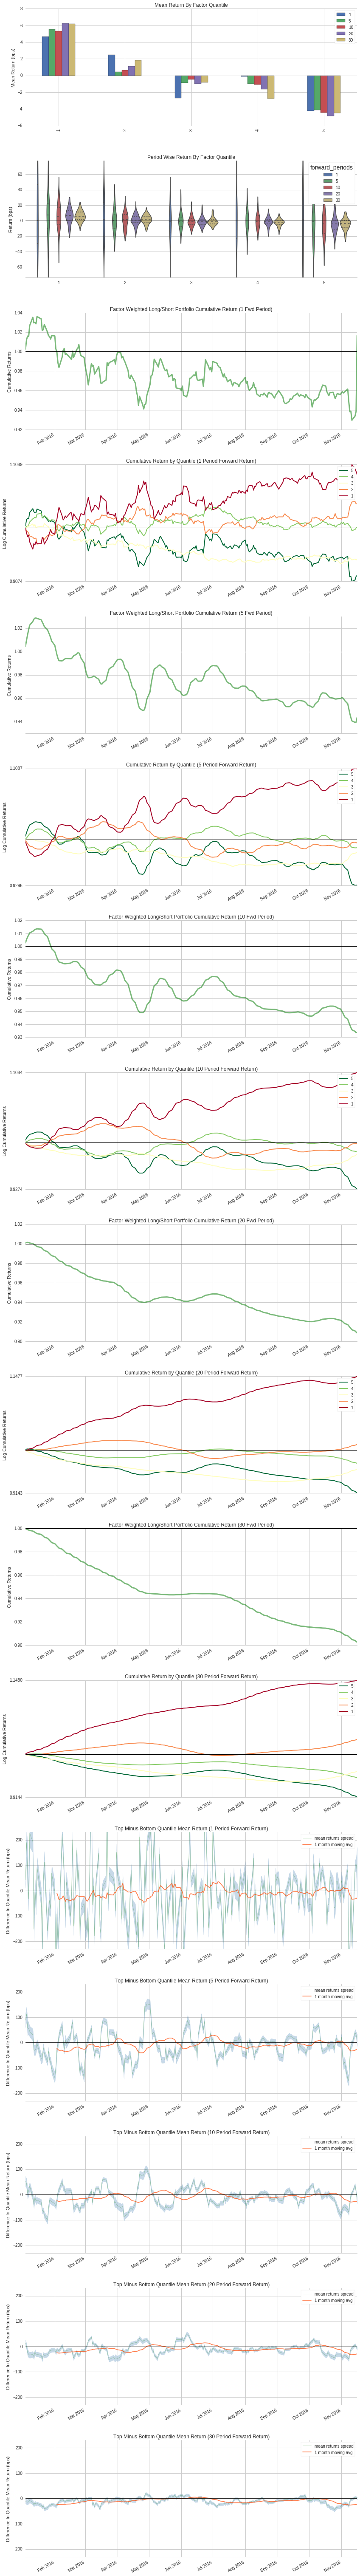

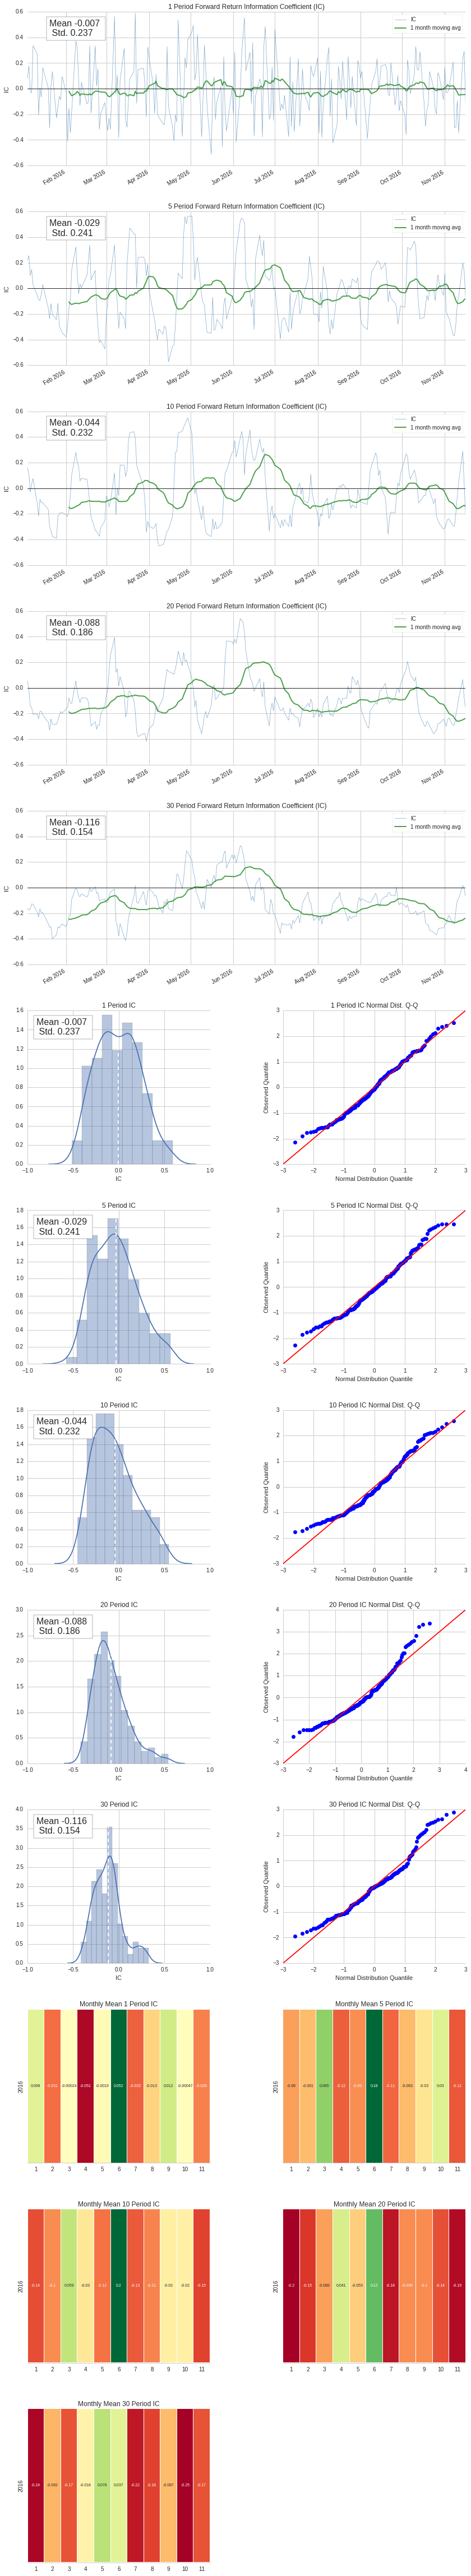

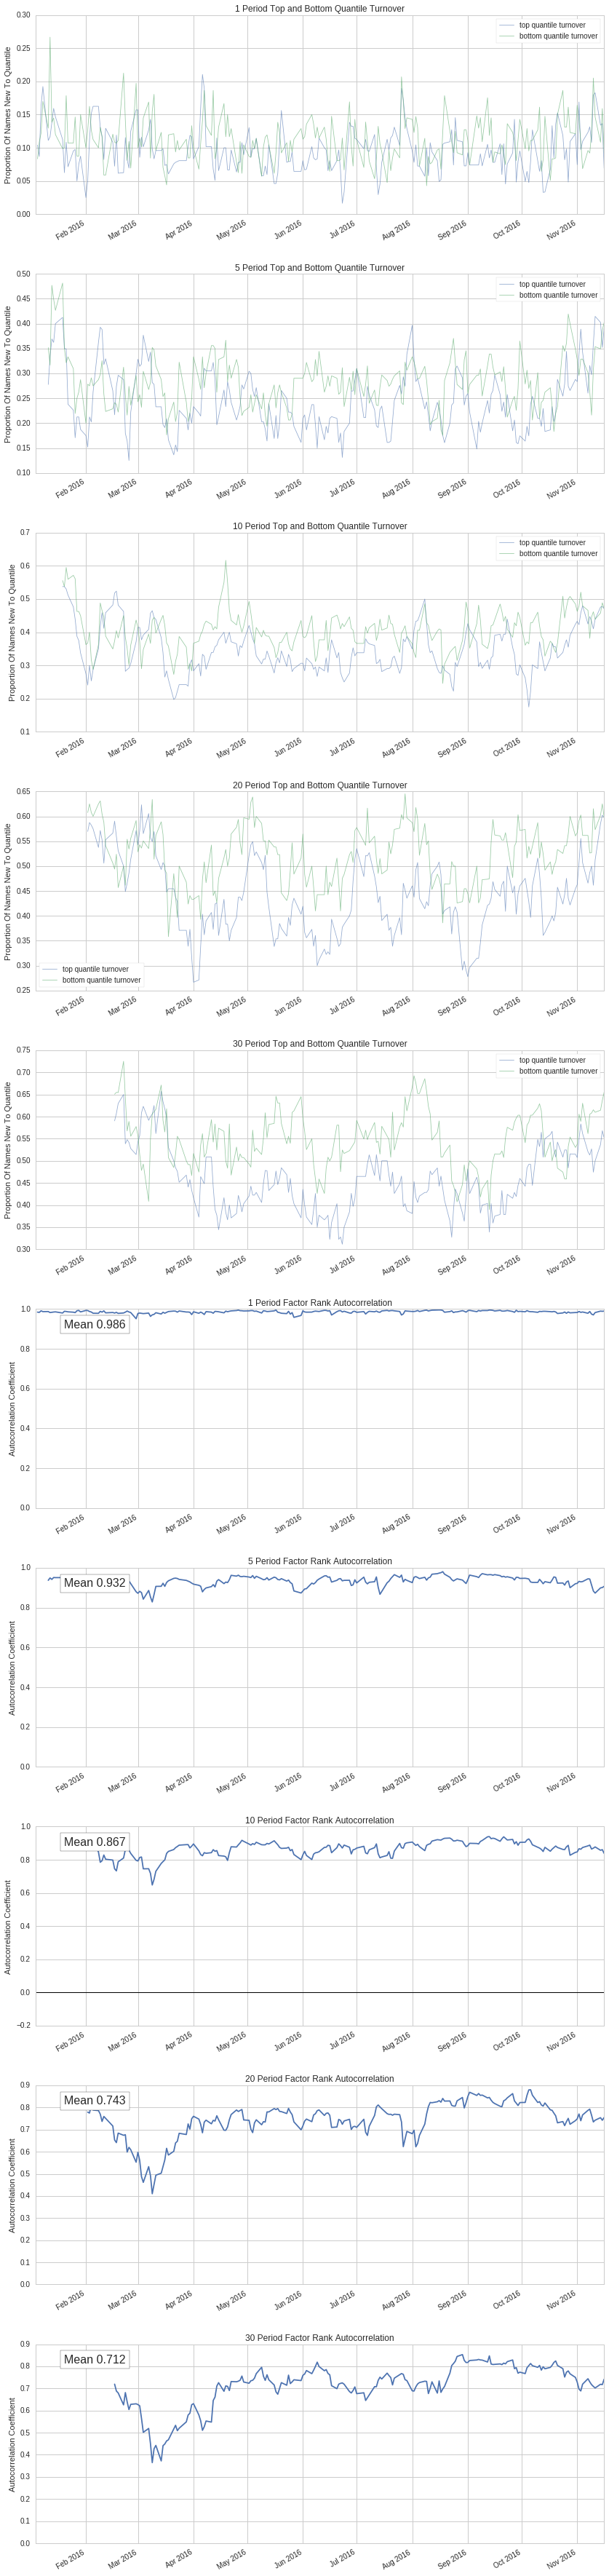

In [136]:
al.tears.create_full_tear_sheet(factor_data)